In [2]:
import os
import pandas as pd

# Define the path to the PPG data folder
ppg_data_path = '/kaggle/input/tquest2/PPG-BP Database/Data File/0_subject/'

# Initialize a list to hold PPG data
ppg_data_list = []

# Print the contents of the PPG data path
print("Contents of PPG data directory:", os.listdir(ppg_data_path))

# Loop through each file in the PPG data directory
for file_name in os.listdir(ppg_data_path):
    if file_name.endswith('.txt'):
        ppg_file_path = os.path.join(ppg_data_path, file_name)
        try:
            # Load the PPG signal data
            ppg_data = pd.read_csv(ppg_file_path, sep='\t', header=None)
            
            # Extract subject ID from the file name
            subject_id = file_name.split('_')[0]
            ppg_data['subject_ID'] = subject_id
            
            # Append to the list
            ppg_data_list.append(ppg_data)
        
        except Exception as e:
            print(f"Error loading file {ppg_file_path}: {e}")

# Combine all PPG data into a single DataFrame
if ppg_data_list:
    ppg_df = pd.concat(ppg_data_list, ignore_index=True)
    print("Combined PPG DataFrame shape:", ppg_df.shape)
else:
    print("No PPG data was loaded.")


Contents of PPG data directory: ['259_1.txt', '111_3.txt', '241_2.txt', '161_3.txt', '226_2.txt', '167_3.txt', '209_1.txt', '122_2.txt', '201_2.txt', '240_3.txt', '179_3.txt', '188_2.txt', '10_3.txt', '90_2.txt', '87_1.txt', '156_3.txt', '97_1.txt', '125_1.txt', '410_3.txt', '222_1.txt', '221_3.txt', '50_3.txt', '14_1.txt', '239_1.txt', '253_3.txt', '57_2.txt', '30_2.txt', '126_1.txt', '136_3.txt', '17_2.txt', '253_2.txt', '166_3.txt', '150_3.txt', '228_3.txt', '415_3.txt', '254_1.txt', '193_2.txt', '41_2.txt', '24_2.txt', '12_1.txt', '197_2.txt', '239_2.txt', '142_3.txt', '145_3.txt', '47_1.txt', '105_1.txt', '219_3.txt', '15_3.txt', '104_3.txt', '203_2.txt', '10_2.txt', '151_2.txt', '150_2.txt', '216_2.txt', '119_3.txt', '191_2.txt', '100_1.txt', '254_3.txt', '233_2.txt', '67_3.txt', '176_2.txt', '191_3.txt', '43_2.txt', '85_1.txt', '246_2.txt', '183_3.txt', '412_3.txt', '116_2.txt', '412_2.txt', '415_2.txt', '175_2.txt', '197_1.txt', '93_3.txt', '54_1.txt', '103_1.txt', '141_2.txt',

In [3]:
# Load the cardiovascular dataset
cardio_data_path = '/kaggle/input/tquest2/PPG-BP Database/Data File/PPG-BP dataset.xlsx'
cardio_df = pd.read_excel(cardio_data_path, sheet_name='cardiovascular dataset')  # Specify the sheet name directly

# Clean up the cardiovascular DataFrame
cardio_df.columns = cardio_df.iloc[0]  # Set the first row as the header
cardio_df = cardio_df[1:]  # Remove the header row
cardio_df.reset_index(drop=True, inplace=True)

# Select only the relevant columns
cardio_df = cardio_df[['subject_ID', 'Sex(M/F)', 'Age(year)', 'Height(cm)', 'Weight(kg)', 
                       'Systolic Blood Pressure(mmHg)', 'Diastolic Blood Pressure(mmHg)', 
                       'Heart Rate(b/m)', 'BMI(kg/m^2)', 'Hypertension', 'Diabetes', 
                       'cerebral infarction', 'cerebrovascular disease']]

# Remove columns with all NaN values
cardio_df.dropna(axis=1, how='all', inplace=True)

# Print the shape of the cleaned cardiovascular DataFrame
print("Cardiovascular DataFrame shape after cleaning:", cardio_df.shape)


Cardiovascular DataFrame shape after cleaning: (219, 13)


In [4]:
# Convert subject_ID columns to the same type
ppg_df['subject_ID'] = ppg_df['subject_ID'].astype(str)
cardio_df['subject_ID'] = cardio_df['subject_ID'].astype(str)

# Merge the DataFrames
merged_df = pd.merge(ppg_df, cardio_df, on='subject_ID', how='inner')

# Check the shape of the merged DataFrame
print("Merged DataFrame shape:", merged_df.shape)

# Optionally, display the first few rows of the merged DataFrame
print(merged_df.head())


Merged DataFrame shape: (657, 4214)
        0       1       2       3       4       5       6       7       8  \
0  1694.0  1701.0  1701.0  1701.0  1635.0  1635.0  1688.0  1688.0  1688.0   
1  1866.0  1866.0  1866.0  1939.0  1939.0  1853.0  1853.0  1853.0  1876.0   
2  1820.0  1820.0  1820.0  1816.0  1816.0  1839.0  1839.0  1839.0  1771.0   
3  1899.0  1899.0  1898.0  1898.0  1892.0  1892.0  1892.0  1875.0  1875.0   
4  1902.0  1902.0  1875.0  1875.0  1875.0  1887.0  1887.0  1916.0  1916.0   

        9  ...  Height(cm)  Weight(kg)  Systolic Blood Pressure(mmHg)  \
0  1627.0  ...         152          44                            127   
1  1876.0  ...         152          44                            127   
2  1771.0  ...         152          44                            127   
3  1866.0  ...         170          73                            169   
4  1916.0  ...         170          73                            169   

   Diastolic Blood Pressure(mmHg)  Heart Rate(b/m)  BMI(kg/m^2

In [5]:
# Remove columns that are entirely NaN
merged_df_cleaned = merged_df.dropna(axis=1, how='all')

# Optionally, display the shape of the cleaned DataFrame
print("Cleaned Merged DataFrame shape:", merged_df_cleaned.shape)

# Export the cleaned DataFrame to a CSV file
output_file_path = '/kaggle/working/cleaned_merged_data.csv'
merged_df_cleaned.to_csv(output_file_path, index=False)

print(f"Cleaned merged data has been saved to {output_file_path}")


Cleaned Merged DataFrame shape: (657, 4213)
Cleaned merged data has been saved to /kaggle/working/cleaned_merged_data.csv


In [6]:
import pandas as pd

# Load the cleaned merged data
data_path = '/kaggle/working/cleaned_merged_data.csv'
df = pd.read_csv(data_path)

# Convert the 'Systolic Blood Pressure(mmHg)' column to numeric, coercing errors
df['Systolic Blood Pressure(mmHg)'] = pd.to_numeric(df['Systolic Blood Pressure(mmHg)'], errors='coerce')

# Check for any NaNs created due to coercion
print("NaNs in Systolic Blood Pressure:", df['Systolic Blood Pressure(mmHg)'].isnull().sum())


NaNs in Systolic Blood Pressure: 0


<ipython-input-6-d60cbd5ee52c>:5: DtypeWarning: Columns (4212) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


In [7]:
# Display first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# Summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))

# Data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

# Unique values in specific columns
print("\nUnique values in 'Hypertension':", df['Hypertension'].unique())
print("Unique values in 'Diabetes':", df['Diabetes'].unique())


First few rows of the DataFrame:
        0       1       2       3       4       5       6       7       8  \
0  1694.0  1701.0  1701.0  1701.0  1635.0  1635.0  1688.0  1688.0  1688.0   
1  1866.0  1866.0  1866.0  1939.0  1939.0  1853.0  1853.0  1853.0  1876.0   
2  1820.0  1820.0  1820.0  1816.0  1816.0  1839.0  1839.0  1839.0  1771.0   
3  1899.0  1899.0  1898.0  1898.0  1892.0  1892.0  1892.0  1875.0  1875.0   
4  1902.0  1902.0  1875.0  1875.0  1875.0  1887.0  1887.0  1916.0  1916.0   

        9  ...  Height(cm)  Weight(kg)  Systolic Blood Pressure(mmHg)  \
0  1627.0  ...         152          44                            127   
1  1876.0  ...         152          44                            127   
2  1771.0  ...         152          44                            127   
3  1866.0  ...         170          73                            169   
4  1916.0  ...         170          73                            169   

   Diastolic Blood Pressure(mmHg)  Heart Rate(b/m)  BMI(kg/m^2)  

In [8]:
import numpy as np

# Function to extract features from PPG signal data
def extract_ppg_features(ppg_df):
    # Example features: mean, std, max, min, etc.
    features = pd.DataFrame()
    features['mean'] = ppg_df.mean(axis=1)
    features['std'] = ppg_df.std(axis=1)
    features['max'] = ppg_df.max(axis=1)
    features['min'] = ppg_df.min(axis=1)
    features['median'] = ppg_df.median(axis=1)
    # Add more features as needed
    return features

# Extract features from the PPG DataFrame
ppg_features = extract_ppg_features(merged_df_cleaned.iloc[:, :10])  # Adjust slice for PPG columns


In [9]:
# Assuming clinical features are in the last columns of merged_df_cleaned
clinical_features = merged_df_cleaned.iloc[:, -11:]  # Adjust this to your actual clinical feature columns
# Combine PPG features with clinical features
final_features = pd.concat([ppg_features, clinical_features.reset_index(drop=True)], axis=1)


In [10]:
# Assuming the last two columns in merged_df_cleaned are your target variables
y_systolic = merged_df_cleaned['Systolic Blood Pressure(mmHg)']
y_diastolic = merged_df_cleaned['Diastolic Blood Pressure(mmHg)']


In [11]:
from sklearn.model_selection import train_test_split

# Split the data (80:20)
X_train, X_test, y_train_systolic, y_test_systolic = train_test_split(final_features, y_systolic, test_size=0.2, random_state=42)
X_train, X_test, y_train_diastolic, y_test_diastolic = train_test_split(final_features, y_diastolic, test_size=0.2, random_state=42)


In [12]:
pip install optuna


Note: you may need to restart the kernel to use updated packages.


In [13]:
import optuna
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [14]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return mae, rmse


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['mean', 'std', 'max', 'min', 'median']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Hypertension', 'Diabetes', 'cerebral infarction', 'cerebrovascular disease'])
    ]
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])


In [16]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
}

# Grid search for Systolic Blood Pressure
grid_search_systolic = GridSearchCV(pipeline, 
                                     param_grid, 
                                     cv=5, 
                                     scoring='neg_mean_squared_error')

# Fit the model
grid_search_systolic.fit(X_train, y_train_systolic)

# Best model and parameters for Systolic
best_model_systolic = grid_search_systolic.best_estimator_
print(f"Systolic Blood Pressure - Best Parameters: {grid_search_systolic.best_params_}")

# Evaluate the model
y_pred_systolic = best_model_systolic.predict(X_test)
mae_systolic = mean_absolute_error(y_test_systolic, y_pred_systolic)
rmse_systolic = np.sqrt(mean_squared_error(y_test_systolic, y_pred_systolic))
print(f"Systolic Blood Pressure - MAE: {mae_systolic}, RMSE: {rmse_systolic}")

# Repeat for Diastolic Blood Pressure
grid_search_diastolic = GridSearchCV(pipeline, 
                                       param_grid, 
                                       cv=5, 
                                       scoring='neg_mean_squared_error')

# Fit the model
grid_search_diastolic.fit(X_train, y_train_diastolic)

# Best model and parameters for Diastolic
best_model_diastolic = grid_search_diastolic.best_estimator_
print(f"Diastolic Blood Pressure - Best Parameters: {grid_search_diastolic.best_params_}")

# Evaluate the model
y_pred_diastolic = best_model_diastolic.predict(X_test)
mae_diastolic = mean_absolute_error(y_test_diastolic, y_pred_diastolic)
rmse_diastolic = np.sqrt(mean_squared_error(y_test_diastolic, y_pred_diastolic))
print(f"Diastolic Blood Pressure - MAE: {mae_diastolic}, RMSE: {rmse_diastolic}")


Systolic Blood Pressure - Best Parameters: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Systolic Blood Pressure - MAE: 5.800634964599543, RMSE: 7.303901144918651
Diastolic Blood Pressure - Best Parameters: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Diastolic Blood Pressure - MAE: 6.956211062771718, RMSE: 8.489623214406844


Evaluating models for Systolic Blood Pressure:
Random Forest: MAE=5.8456, RMSE=7.3614, R²=0.8885, Explained Variance=0.8886
Gradient Boosting: MAE=5.9320, RMSE=7.3469, R²=0.8890, Explained Variance=0.8890
XGBoost: MAE=6.1887, RMSE=7.6821, R²=0.8786, Explained Variance=0.8786
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 525, number of used features: 16
[LightGBM] [Info] Start training from score 127.560000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

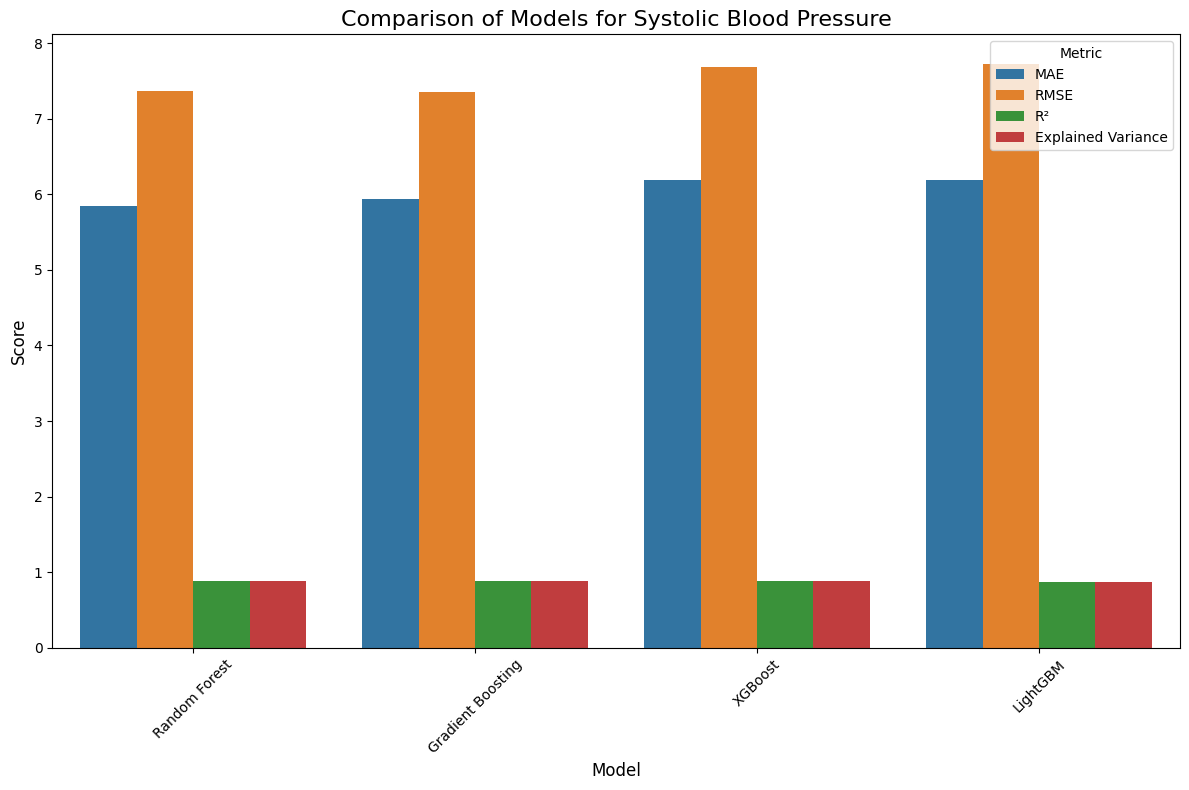

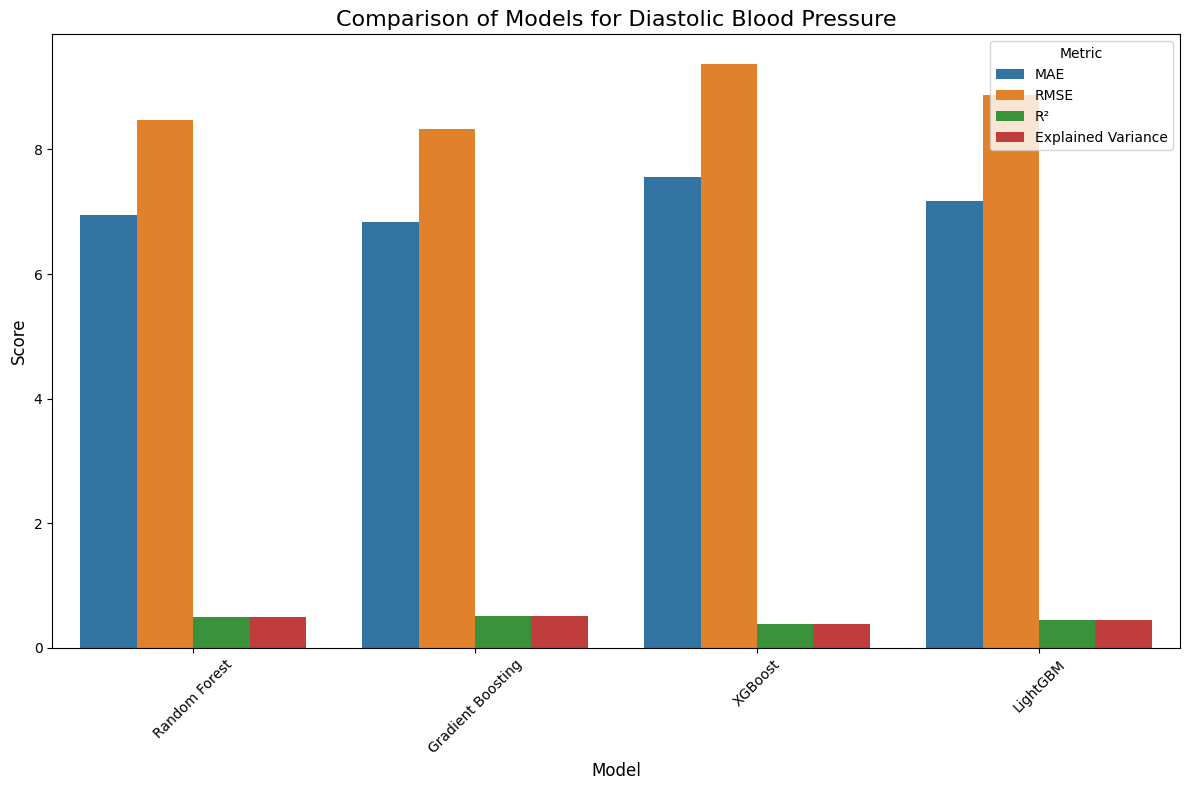

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Assuming 'final_features' contains both numerical and categorical features
numeric_features = ['mean', 'std', 'max', 'min', 'median']
categorical_features = ['Hypertension', 'Diabetes', 'cerebral infarction', 'cerebrovascular disease']

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define a function to evaluate different models and return all metrics
def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Random Forest": Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(random_state=42))]),
        "Gradient Boosting": Pipeline(steps=[('preprocessor', preprocessor), ('model', GradientBoostingRegressor(random_state=42))]),
        "XGBoost": Pipeline(steps=[('preprocessor', preprocessor), ('model', XGBRegressor(random_state=42))]),
        "LightGBM": Pipeline(steps=[('preprocessor', preprocessor), ('model', LGBMRegressor(random_state=42))]),
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        evs = explained_variance_score(y_test, y_pred)
        
        # Collect the results
        results.append({
            'Model': name,
            'MAE': mae,
            'RMSE': rmse,
            'R²': r2,
            'Explained Variance': evs
        })
        
        # Print metrics
        print(f"{name}: MAE={mae:.4f}, RMSE={rmse:.4f}, R²={r2:.4f}, Explained Variance={evs:.4f}")

    # Convert the results into a DataFrame for easy plotting
    results_df = pd.DataFrame(results)
    return results_df

# Assuming you have X_train, X_test, y_train_systolic, and y_test_systolic already prepared

# Evaluate models for Systolic Blood Pressure
print("Evaluating models for Systolic Blood Pressure:")
results_systolic = evaluate_models(X_train, X_test, y_train_systolic, y_test_systolic)

# Evaluate models for Diastolic Blood Pressure
print("\nEvaluating models for Diastolic Blood Pressure:")
results_diastolic = evaluate_models(X_train, X_test, y_train_diastolic, y_test_diastolic)

# Plotting the comparison of models for Systolic and Diastolic Blood Pressure
def plot_comparison(results_df, title):
    plt.figure(figsize=(12, 8))
    
    # Melt the results dataframe for easier plotting
    results_melted = results_df.melt(id_vars='Model', value_vars=['MAE', 'RMSE', 'R²', 'Explained Variance'],
                                     var_name='Metric', value_name='Value')
    
    # Plot using Seaborn
    sns.barplot(x='Model', y='Value', hue='Metric', data=results_melted)
    
    plt.title(title, fontsize=16)
    plt.ylabel('Score', fontsize=12)
    plt.xlabel('Model', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Combine results for both Systolic and Diastolic and plot them
plot_comparison(results_systolic, "Comparison of Models for Systolic Blood Pressure")
plot_comparison(results_diastolic, "Comparison of Models for Diastolic Blood Pressure")


In [18]:
from xgboost import XGBRegressor
import joblib
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import seaborn as sns
import pandas as pd

# Define the final model with the best parameters
best_params_systolic = {
    'model__learning_rate': 0.01,
    'model__max_depth': 3,
    'model__n_estimators': 100
}

best_params_diastolic = {
    'n_estimators': 200,
    'max_depth': 10,
    'min_samples_split': 5
}

# Define the final pipeline
final_pipeline_systolic = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers=[
        ('num', StandardScaler(), ['mean', 'std', 'max', 'min', 'median', 'Age(year)', 'Height(cm)', 'Weight(kg)', 'Heart Rate(b/m)', 'BMI(kg/m^2)']),
        ('cat', OneHotEncoder(), ['Hypertension', 'Diabetes', 'cerebral infarction', 'cerebrovascular disease'])
    ])),
    ('model', XGBRegressor(**best_params_systolic))
])

# Define the final pipeline for Diastolic using GradientBoostingRegressor
final_pipeline_diastolic = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers=[
        ('num', StandardScaler(), ['mean', 'std', 'max', 'min', 'median', 'Age(year)', 'Height(cm)', 'Weight(kg)', 'Heart Rate(b/m)', 'BMI(kg/m^2)']),
        ('cat', OneHotEncoder(), ['Hypertension', 'Diabetes', 'cerebral infarction', 'cerebrovascular disease'])
    ])),
    ('model', GradientBoostingRegressor(**best_params_diastolic, random_state=42))
])


# Fit the final models
final_pipeline_systolic.fit(X_train, y_train_systolic)
final_pipeline_diastolic.fit(X_train, y_train_diastolic)

# Save the models for future use
joblib.dump(final_pipeline_systolic, 'final_pipeline_systolic_model.pkl')
joblib.dump(final_pipeline_diastolic, 'final_pipeline_diastolic_model.pkl')

print("Models saved successfully!")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:09:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "model__learning_rate", "model__max_depth", "model__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Models saved successfully!


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the models (if not already loaded)
loaded_pipeline_systolic = joblib.load('final_pipeline_systolic_model.pkl')
loaded_pipeline_diastolic = joblib.load('final_pipeline_diastolic_model.pkl')

# Make predictions on the test set
systolic_predictions = loaded_pipeline_systolic.predict(X_test)
diastolic_predictions = loaded_pipeline_diastolic.predict(X_test)

# Calculate test metrics for Systolic Blood Pressure
mae_systolic = mean_absolute_error(y_test_systolic, systolic_predictions)
rmse_systolic = np.sqrt(mean_squared_error(y_test_systolic, systolic_predictions))
r2_systolic = r2_score(y_test_systolic, systolic_predictions)

# Calculate test metrics for Diastolic Blood Pressure
mae_diastolic = mean_absolute_error(y_test_diastolic, diastolic_predictions)
rmse_diastolic = np.sqrt(mean_squared_error(y_test_diastolic, diastolic_predictions))
r2_diastolic = r2_score(y_test_diastolic, diastolic_predictions)

# Print the results
print("Test Metrics for Systolic Blood Pressure:")
print(f"MAE: {mae_systolic:.4f}")
print(f"RMSE: {rmse_systolic:.4f}")
print(f"R²: {r2_systolic:.4f}")

print("\nTest Metrics for Diastolic Blood Pressure:")
print(f"MAE: {mae_diastolic:.4f}")
print(f"RMSE: {rmse_diastolic:.4f}")
print(f"R²: {r2_diastolic:.4f}")


Test Metrics for Systolic Blood Pressure:
MAE: 2.0650
RMSE: 3.4300
R²: 0.9758

Test Metrics for Diastolic Blood Pressure:
MAE: 1.1972
RMSE: 2.2266
R²: 0.9655


In [20]:
from sklearn import set_config
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

# Set the pipeline display style (in Jupyter or similar)
set_config(display='diagram')

# Display the pipeline
print("Model Pipeline for Systolic Blood Pressure:")
print(final_pipeline_systolic)

print("Model Pipeline for Diastolic Blood Pressure:")
print(final_pipeline_diastolic)


Model Pipeline for Systolic Blood Pressure:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['mean', 'std', 'max', 'min',
                                                   'median', 'Age(year)',
                                                   'Height(cm)', 'Weight(kg)',
                                                   'Heart Rate(b/m)',
                                                   'BMI(kg/m^2)']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Hypertension', 'Diabetes',
                                                   'cerebral infarction',
                                                   'cerebrovascular '
                                                   'disease'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, ca...
                    

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


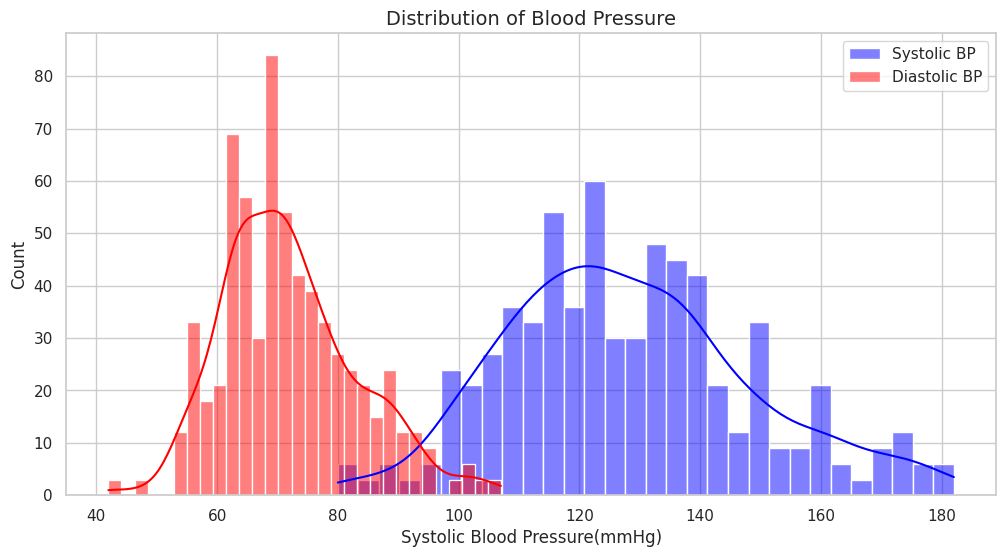

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


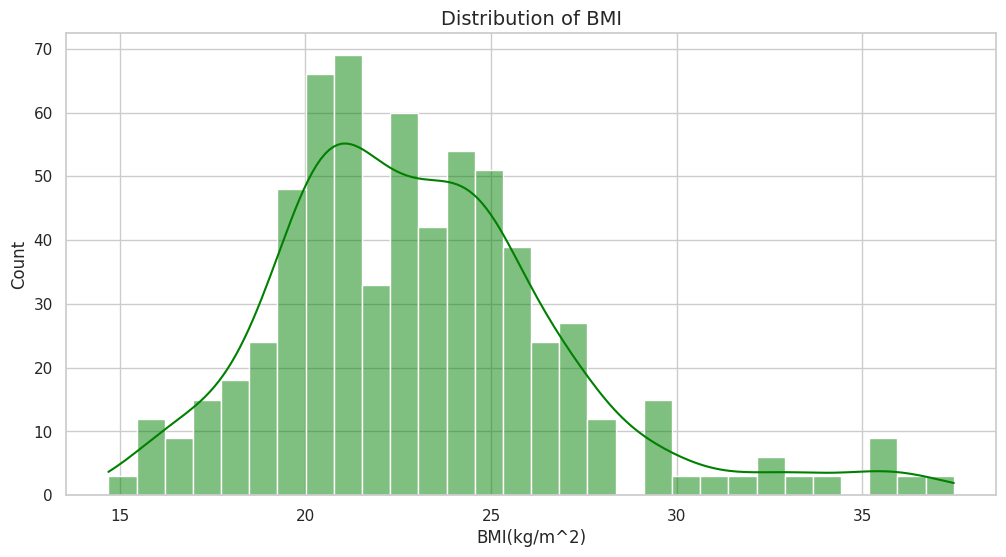

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


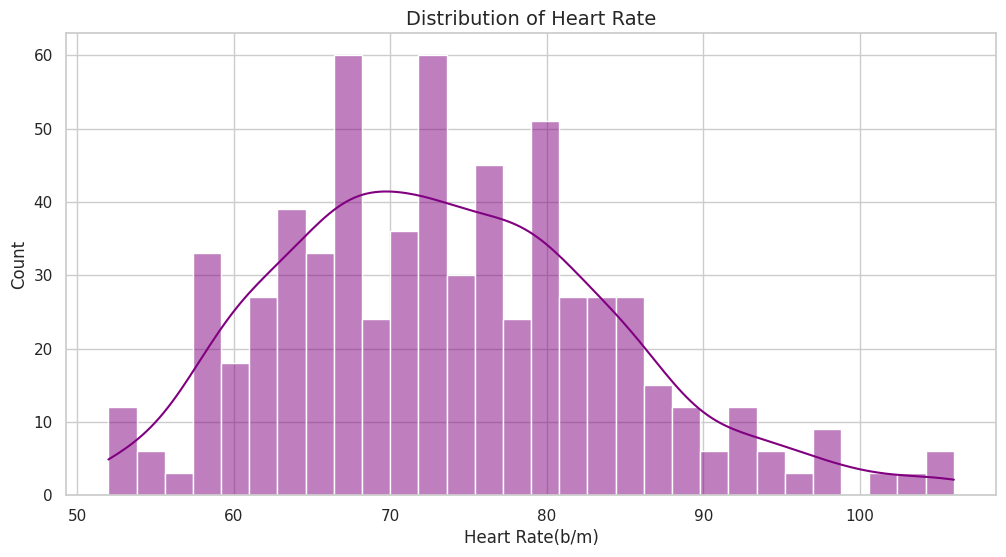

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# 1. Univariate Analysis - Blood Pressure Distribution
plt.figure(figsize=(12, 6))
sns.histplot(merged_df_cleaned['Systolic Blood Pressure(mmHg)'], kde=True, bins=30, color='blue', label='Systolic BP')
sns.histplot(merged_df_cleaned['Diastolic Blood Pressure(mmHg)'], kde=True, bins=30, color='red', label='Diastolic BP')
plt.title("Distribution of Blood Pressure", fontsize=14)
plt.legend()
plt.show()

# 2. BMI Distribution (Body Mass Index)
plt.figure(figsize=(12, 6))
sns.histplot(merged_df_cleaned['BMI(kg/m^2)'], kde=True, bins=30, color='green')
plt.title("Distribution of BMI", fontsize=14)
plt.show()

# 3. Heart Rate Distribution
plt.figure(figsize=(12, 6))
sns.histplot(merged_df_cleaned['Heart Rate(b/m)'], kde=True, bins=30, color='purple')
plt.title("Distribution of Heart Rate", fontsize=14)
plt.show()


<Figure size 1400x800 with 0 Axes>

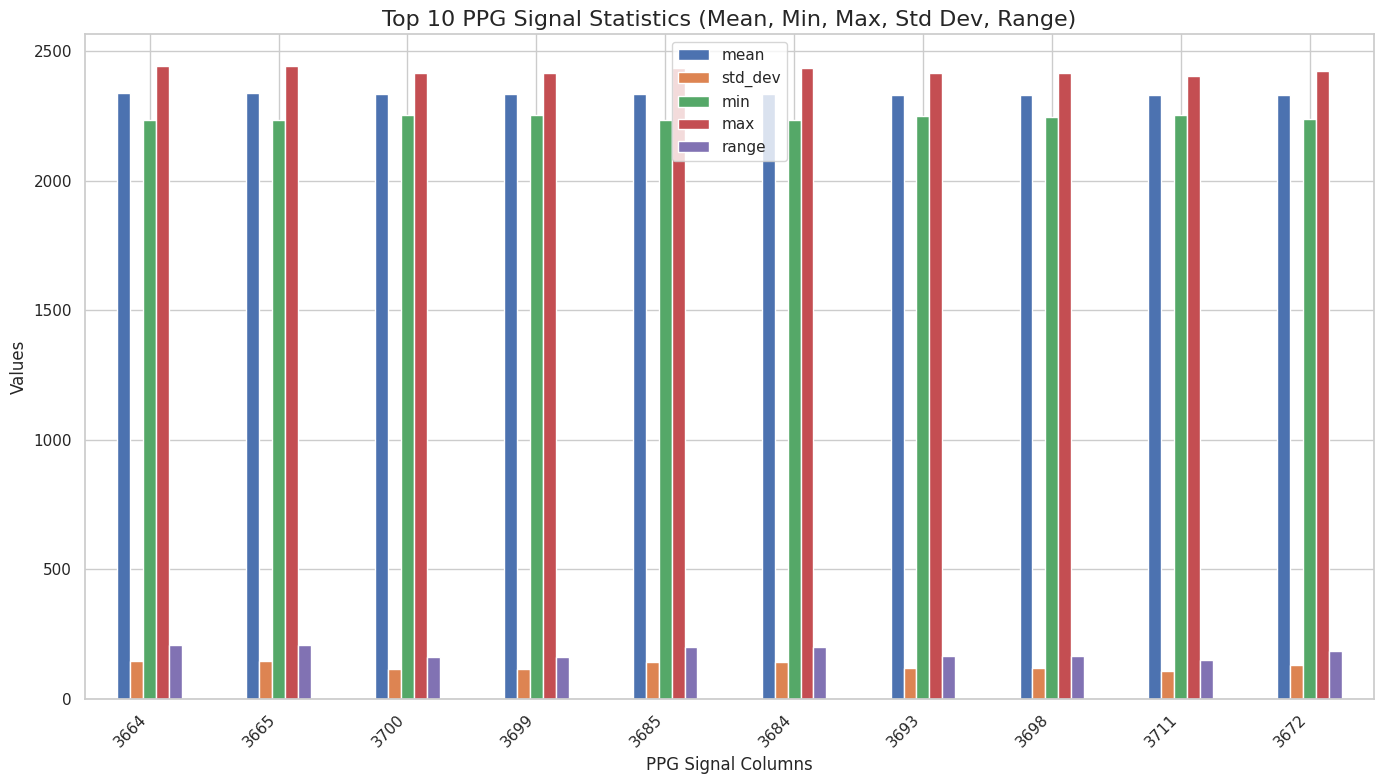

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the statistics for the PPG signal columns
ppg_signal_stats = merged_df_cleaned.iloc[:, :4202].describe().T

# Add the following statistics to the DataFrame
ppg_signal_stats['range'] = ppg_signal_stats['max'] - ppg_signal_stats['min']
ppg_signal_stats['mean'] = ppg_signal_stats['mean']
ppg_signal_stats['std_dev'] = ppg_signal_stats['std']
ppg_signal_stats['min'] = ppg_signal_stats['min']
ppg_signal_stats['max'] = ppg_signal_stats['max']

# Sort the data to focus on key statistics (top 10 highest mean values)
top_10_ppg_signals = ppg_signal_stats[['mean', 'std_dev', 'min', 'max', 'range']].sort_values(by='mean', ascending=False).head(10)

# Plot the key statistics for the top 10 PPG signals
plt.figure(figsize=(14, 8))

# Plotting the statistics
top_10_ppg_signals[['mean', 'std_dev', 'min', 'max', 'range']].plot(kind='bar', figsize=(14, 8))

# Customizing the plot
plt.title('Top 10 PPG Signal Statistics (Mean, Min, Max, Std Dev, Range)', fontsize=16)
plt.ylabel('Values')
plt.xlabel('PPG Signal Columns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


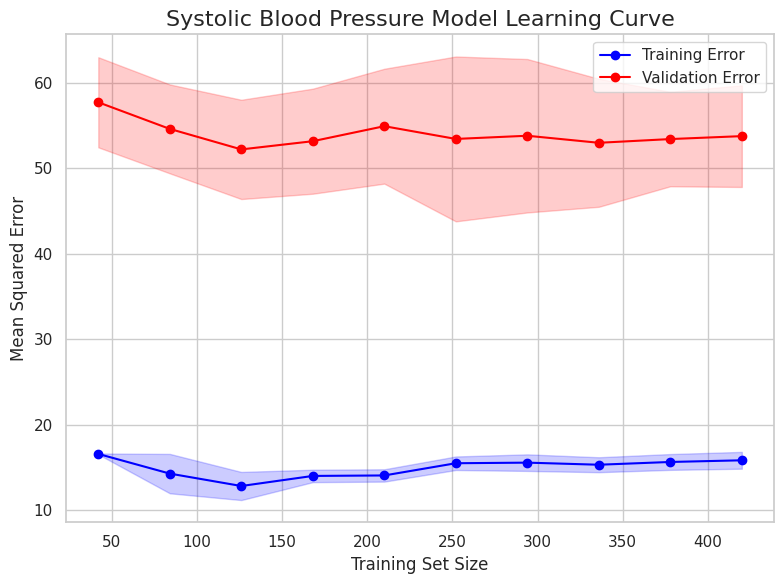

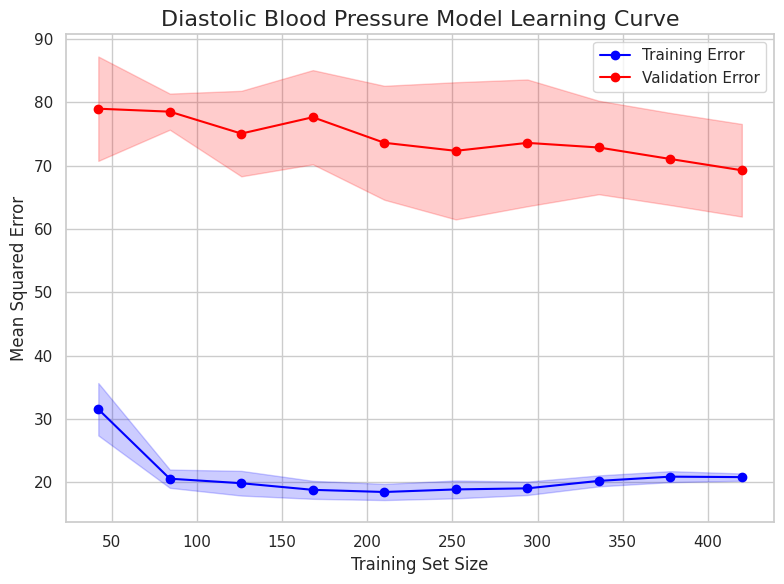

In [25]:
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(model, X_train, y_train, title):
    # Generate learning curve data
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            scoring='neg_mean_squared_error')
    
    # Calculate mean and std of train/test scores
    train_mean = -train_scores.mean(axis=1)
    test_mean = -test_scores.mean(axis=1)
    
    # Plot learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label='Training Error', color='blue', marker='o')
    plt.plot(train_sizes, test_mean, label='Validation Error', color='red', marker='o')
    plt.fill_between(train_sizes, train_mean - train_scores.std(axis=1),
                     train_mean + train_scores.std(axis=1), alpha=0.2, color='blue')
    plt.fill_between(train_sizes, test_mean - test_scores.std(axis=1),
                     test_mean + test_scores.std(axis=1), alpha=0.2, color='red')

    plt.title(f'{title} Learning Curve', fontsize=16)
    plt.xlabel('Training Set Size', fontsize=12)
    plt.ylabel('Mean Squared Error', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot learning curves for Systolic and Diastolic models
plot_learning_curve(best_model_systolic, X_train, y_train_systolic, 'Systolic Blood Pressure Model')
plot_learning_curve(best_model_diastolic, X_train, y_train_diastolic, 'Diastolic Blood Pressure Model')
